# GROWTH-RINGS MAPPER

A script that plots growth-rings across map-like scatter plots; the grwoth-rings represent a change in value (such as a shift in airport traffic) over two periods.


# How it works

At each location, an unfilled marker (a thin, dark ring) is drawn based on the initial value for that location (colA).

It then calculates where the ring for the second value would be (colB) - though does not draw it. 

The position of a mid-ring is then calculated. For this mid-ring, another unfilled marker is created. This time, however, the width of the ring (the marker_line_width) is the difference between the two value's (real and imagined) rings. This fills the space between the two value rings neatly.

Therefore, where there has been growth, the ring increases in size; where there has been contraction, the 'fill' goes inwards.

Each set of rings (initial and midpoint) follow the same color scheme - green for growth; red for reduction - though the growth ring is at a lessened opacity.

This script accepts any dataframe containing longitude and latitude (or x and y) values plus two columns of size values. A 'name' column is also required by the hover text.

Graphing is done in Plotly (GO).

In [12]:
import pandas as pd
import numpy as np
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
# Calculate parameters for width and height of map

def setDimensions(dfx):
    
    latitudes = dfx['latitude']
    latmin, latmax = latitudes.min(), latitudes.max()
    latsize = latmax - latmin

    longitudes = dfx['longitude']
    lonmin, lonmax = longitudes.min(), longitudes.max()
    lonsize = lonmax - lonmin

    return np.array([lonsize, latsize])

In [63]:
# Main function

def ringPlotter(dfx, colA, colB, scaler, resizer, nameCol, dfy):
    
    ### PREP
    
    dfx = dfx.fillna(0)
    
    dfx['diff'] = dfx[colB] - dfx[colA]
    dfx['abs'] = abs(dfx['diff'])
    dfx['mid'] = np.where(dfx[colA] >= dfx[colB], ((dfx[colA] - dfx[colB])/2) + dfx[colB], ((dfx[colB] - dfx[colA])/2) + dfx[colA])
    dfx['pc'] = (dfx['diff'] / dfx[colA] * 100).apply(lambda x: round(x,2))

    transparency = 0.55
    dfx['color'] = np.where(dfx['diff'] <= 0, f'rgba(234, 0, 136, {transparency})', f'rgba(35, 203, 167, {transparency})')
    
    marker_sizes1 = list(dfx[colA].fillna(0))
    marker_sizes1 = [x/scaler for x in marker_sizes1]
    
    marker_sizes2 = list(dfx['mid'].fillna(0))
    marker_sizes2 = [x/scaler for x in marker_sizes2]

    marker_linewidth3 = [x/2 for x in list(dfx['abs'])]
    marker_linewidth3 = [x/scaler for x in marker_linewidth3]

    
    #### PLOT
    
    figsize = setDimensions(dfx)

    fig = go.Figure()
        
    # adds a basic dot for each location, whether it has a value or not 
    
    fig.add_scatter( 
        mode="markers",
        x = dfy['longitude'],
        y = dfy['latitude'],
        marker=dict(size = 2, color='#181818', opacity=0.25),
        hoverinfo='skip'
    )
    
    
    # colA ring
    fig.add_scatter( 
            mode="markers",
            x = dfx['longitude'],
            y = dfx['latitude'],
            marker=dict(size = marker_sizes1, color='rgba(255, 255, 255, 0)', opacity=1, line=dict(width=2, color=dfx['color'])),
            hoverinfo='skip',
    )
    
    # ring fill
    fig.add_scatter( 
            mode="markers",
            x = dfx['longitude'], y = dfx['latitude'],
            marker=dict(size = marker_sizes2, color='rgba(255, 255, 255, 0)', opacity=0.75, line=dict(width=marker_linewidth3, color=dfx['color'])),
            hovertext = dfx[nameCol].str.title() + ': ' +  dfx['pc'].apply(lambda x:str(x)) + '%<br>' + dfx[colA].apply(lambda x:str(x).split('.')[0]) + '; ' +  dfx[colB].apply(lambda x:str(x).split('.')[0]), hoverinfo="text" ,
            name=''
    )

    fig.update_layout(title={"yref": "paper", "y" : 1,"yanchor" : "bottom"})
    fig.update_layout(title_text=f"<b>Difference in number, {colA} vs {colB}</b><br><span style='font-size:8pt'>The opaque ring is the starting size. Red padding shows size of decrease; black padding shows size of increase.</span>", )
    fig.update_layout(height=100 + (figsize[1] * resizer), width=figsize[0] * resizer, showlegend=False, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig['layout'].update(margin=dict(l=0,r=0,b=0,t=20))
    fig.update_layout(font_family="Arial", font_color="#181818")
    fig.update_xaxes(showline=False, showgrid=False, visible=False)
    fig.update_yaxes(showline=False, showgrid=False, visible=False)
    
    fig.write_html("HTMLs/ringMap_linear_basic_daily_airport_traffic_2019cfFY2021.html")

    fig.show() 

In this version, it is randomly selecting airports from around Australia and assigning random sets of values.

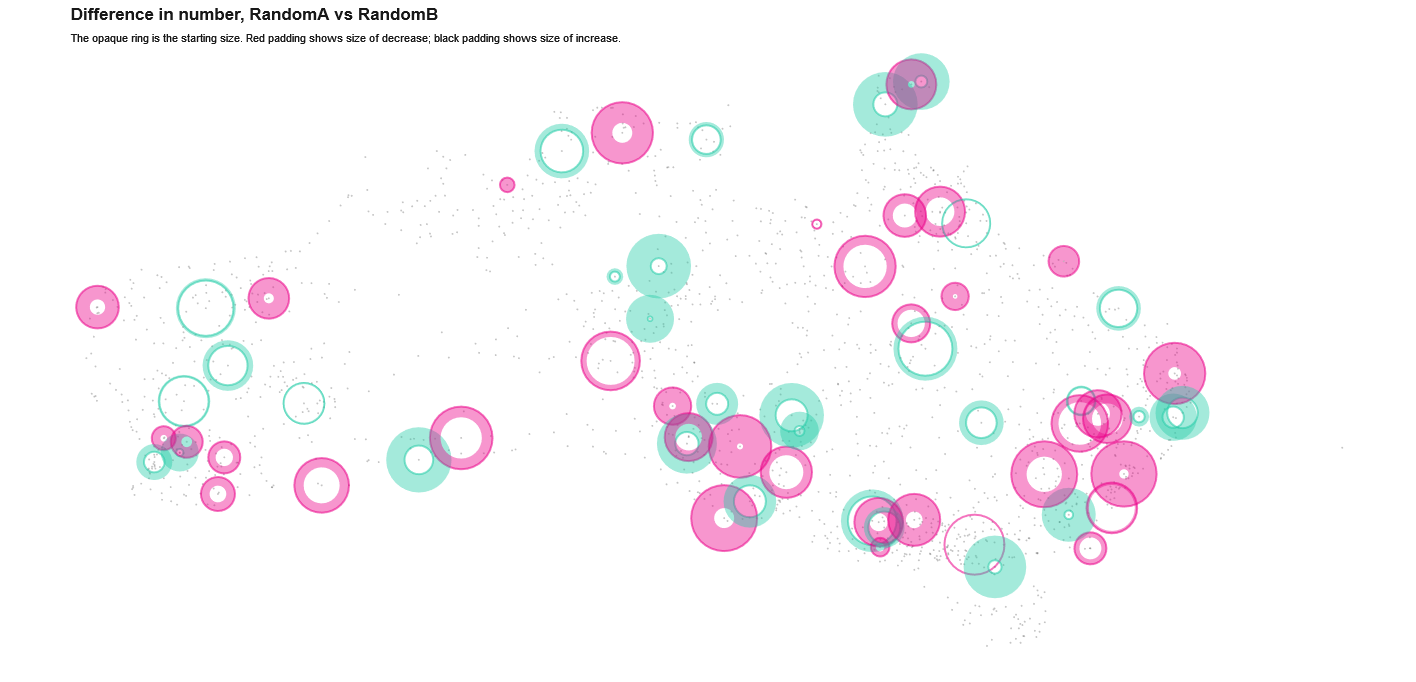

In [64]:

df_coords = pd.read_csv('CSVs/coords/airport_codes_coords.csv')
df_coords['RandomA'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomB'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomX'] = np.random.randint(1, 25, df_coords.shape[0])

df_selected = df_coords.loc[df_coords['RandomX'] == 10]

ringPlotter(df_selected, 'RandomA', 'RandomB', 1.5, 20, 'name', df_coords)

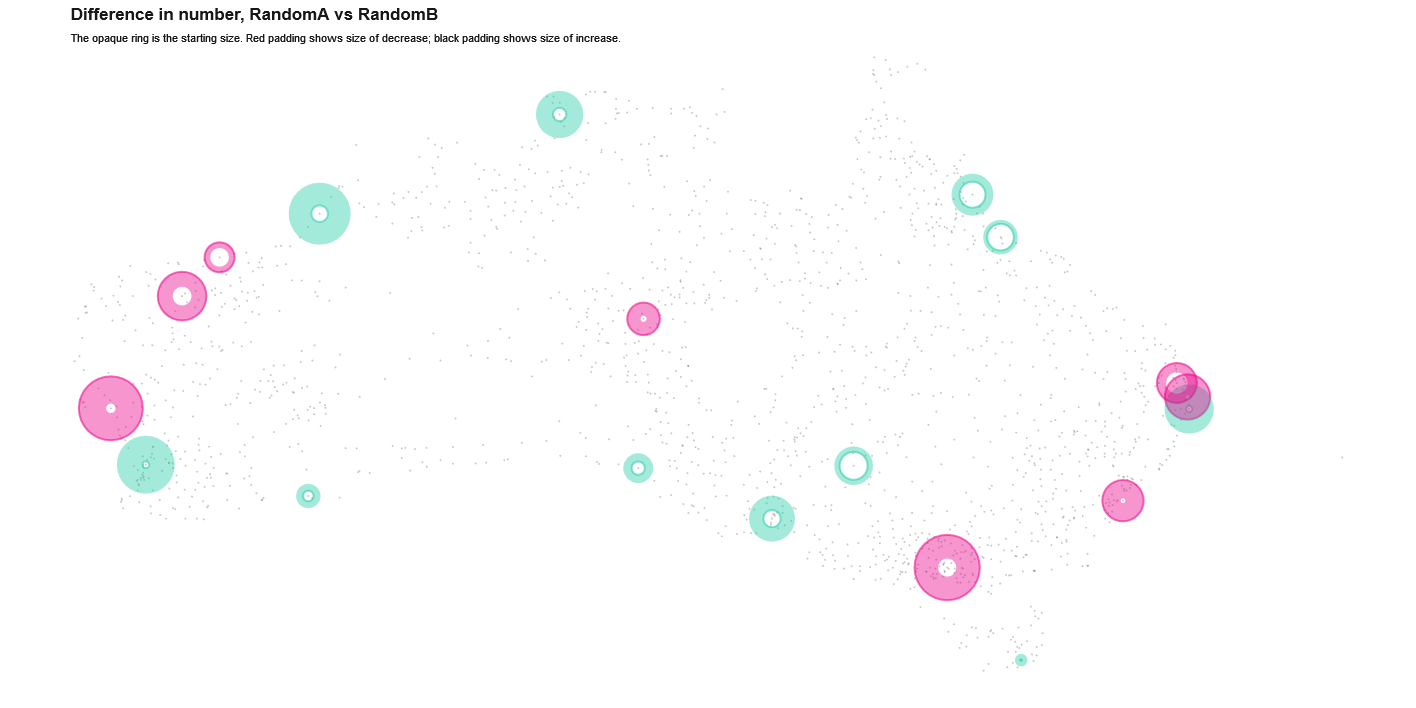

In [68]:
df_coords = pd.read_csv('CSVs/coords/airport_codes_coords.csv')
df_coords['RandomA'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomB'] = np.random.randint(1, 100, df_coords.shape[0])

selected_airports = ['YSSY', 'YMML', 'YBBN', 'YPAD', 'YPPH', 'YMHB', 'YPDN', 'YBRM', 'YBCS', 'YBTL', 'YESP', 'YCDU', 'YPPD', 'YBAS', 'YGEL', 'YBNA', 'YBCG', 'YBHI', 'YBGD']
df_selected = df_coords.loc[df_coords['icao'].isin(selected_airports)]

ringPlotter(df_selected, 'RandomA', 'RandomB', 1.5, 20, 'name', df_coords)

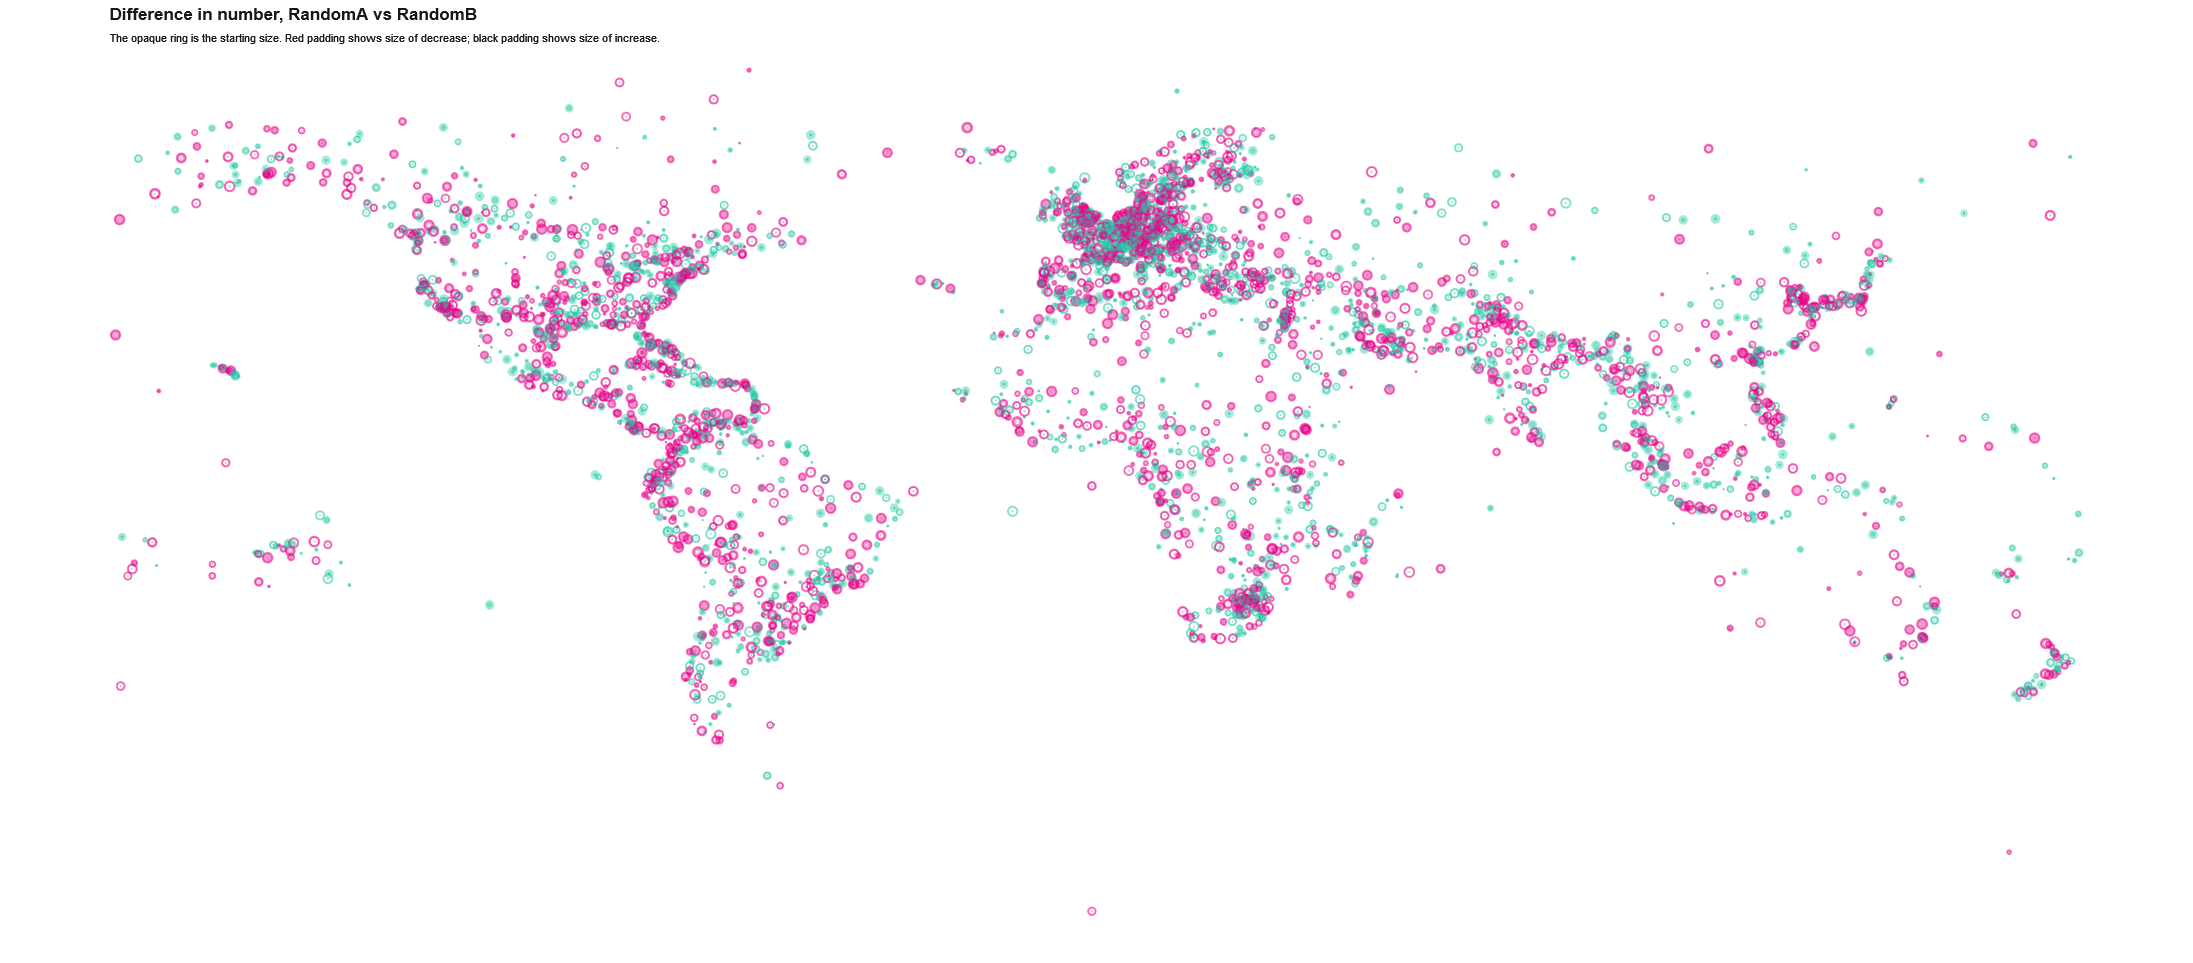

In [90]:
# Using coordinates of major airports around the world

df_coords = pd.read_csv('CSVs/coords/gadb_country_declatlon.csv', header=None)
df_coords = df_coords.rename(columns={0:'name', 1:'latitude', 2:'longitude'})

df_coords['RandomA'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomB'] = np.random.randint(1, 100, df_coords.shape[0])

df_selected = df_coords

ringPlotter(df_selected, 'RandomA', 'RandomB', 10, 5, 'name', df_coords)

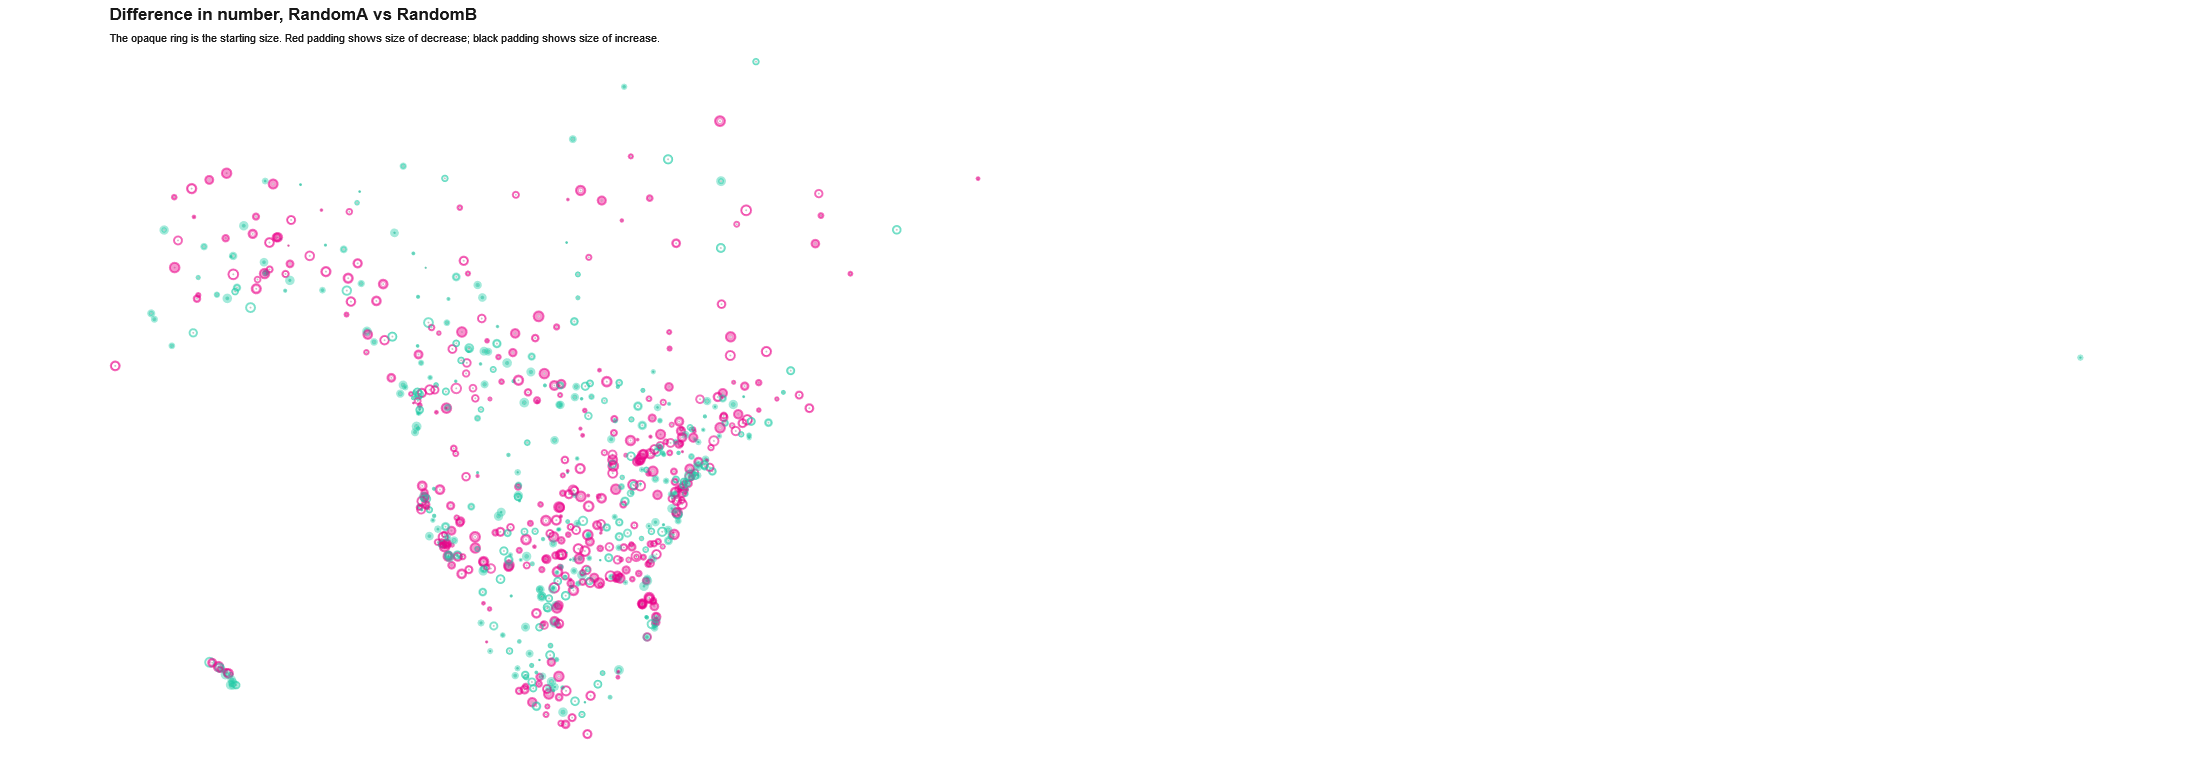

In [215]:
# Using coordinates of major airports around the world

df_coords = pd.read_csv('CSVs/coords/gadb_country_declatlon.csv', header=None)
df_coords = df_coords.rename(columns={0:'name', 1:'latitude', 2:'longitude'})

selected_countries = ['USA', 'CANADA', 'MEXICO', 'GREENLAND']   #    
#selected_countries = ['BRAZIL', 'ARGENTINA', 'URUGUAY', 'CHILE', 'COLOMBIA', 'ECUADOR', 'PARAGUAY', 'BOLIVIA', 'PERU', 'VENEZUELA']   #    
#selected_countries = ['SOUTH AFRICA', 'NAMIBIA', 'BOTSWANA', 'ZIMBABWE', 'LESOTHO', 'ESWATINI','MOZAMBIQUE', 'ZAMBIA', 'NIGERIA', 'TOGO', 'GHANA', 'LIBERIA', 'SIERRA LEONE', 'KENYA', 'TANZANIA', 'ETHIOPIA', 'RWANDA', 'UGANDA', 'CHAD', 'MALI', 'CENTRAL AFRICAN REPUBLIC', 'CAMEROON', 'SUDAN', 'CONGO', 'TUNISIA', 'GABON', 'NIGER', 'IVORY COAST', 'CENTRAL AFRICAN REP.', 'SENEGAL', 'SOUTH SUDAN', 'SOMALIA', 'ANGOLA', 'MAURITANIA', 'ZAIRE', 'EGYPT', 'ALGERIA', 'MOROCCO', 'LIBYA']   # ,

df_coords = df_coords.loc[df_coords['name'].isin(selected_countries)]

df_coords['RandomA'] = np.random.randint(1, 100, df_coords.shape[0])
df_coords['RandomB'] = np.random.randint(1, 100, df_coords.shape[0])

df_selected = df_coords

ringPlotter(df_selected, 'RandomA', 'RandomB', 10, 10, 'name', df_coords)